In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("AirPassengers.csv")

In [3]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df.shape

(144, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [9]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141    False
142    False
143    False
Length: 144, dtype: bool

In [11]:
df['Month']=pd.to_datetime(df['Month'],format='%Y-%m')

In [12]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [13]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [14]:
df.index=df['Month']

In [15]:
df

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [16]:
del df['Month']

In [17]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


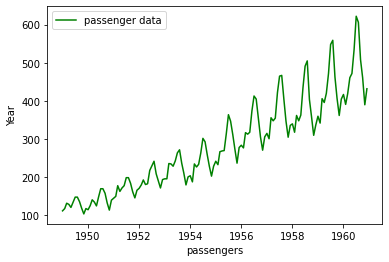

In [18]:
plt.plot(df,color='green',label='passenger data')
plt.xlabel('passengers')
plt.ylabel('Year')
plt.legend()
plt.show()

In [19]:
r_mean=df.rolling(7).mean()

In [20]:
r_mean

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,500.857143
1960-09-01,517.571429
1960-10-01,523.571429


In [21]:
r_std=df.rolling(7).std()
r_std

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,89.523607
1960-09-01,75.403044
1960-10-01,67.510140


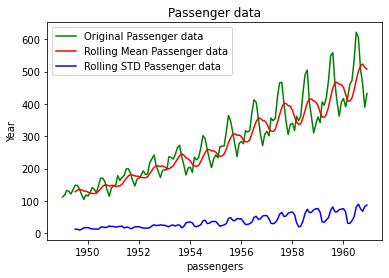

In [22]:
plt.plot(df,color='green',label='Original Passenger data')
plt.plot(r_mean,color='red',label='Rolling Mean Passenger data')
plt.plot(r_std,color='blue',label='Rolling STD Passenger data')
plt.title('Passenger data')
plt.legend(loc='best')
plt.xlabel('passengers')
plt.ylabel('Year')
plt.show()

In [23]:
r_std=df.rolling(5).std()
r_std

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,8.142481
...,...
1960-08-01,74.106005
1960-09-01,63.998437
1960-10-01,67.389168


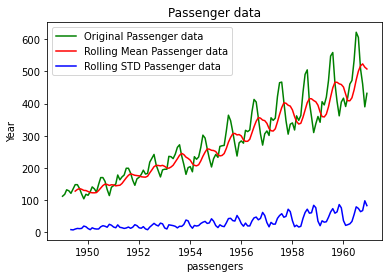

In [24]:
plt.plot(df,color='green',label='Original Passenger data')
plt.plot(r_mean,color='red',label='Rolling Mean Passenger data')
plt.plot(r_std,color='blue',label='Rolling STD Passenger data')
plt.title('Passenger data')
plt.legend(loc='best')
plt.xlabel('passengers')
plt.ylabel('Year')
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
ad_ft=adfuller(df,autolag='AIC')

In [27]:
ad_ft

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [28]:
output=pd.DataFrame({'values':[ad_ft[0],ad_ft[1],ad_ft[2],ad_ft[3],ad_ft[4]['1%'],ad_ft[4]['5%'],ad_ft[4]['10%']],'metric':['Test statistics','P Value','No. of Lags Used','No. of Observation used','Critical Value 1%','Critical Value 5%','Critical Value 10%']})

In [29]:
output

,values,metric
0,0.815369,Test statistics
1,0.991880,P Value
2,13.000000,No. of Lags Used
3,130.000000,No. of Observation used
4,-3.481682,Critical Value 1%
5,-2.884042,Critical Value 5%
6,-2.578770,Critical Value 10%


In [30]:
auto_df=df['#Passengers'].autocorr(lag=1)

In [31]:
auto_df

0.9601946480498523

In [32]:
auto_df1=df['#Passengers'].autocorr(lag=3)

In [33]:
auto_df1

0.837394765081794

In [34]:
auto_df2=df['#Passengers'].autocorr(lag=6)

In [35]:
auto_df2

0.7839187959206183

In [36]:
auto_df3=df['#Passengers'].autocorr(lag=9)

In [37]:
auto_df3

0.8278519011167601

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

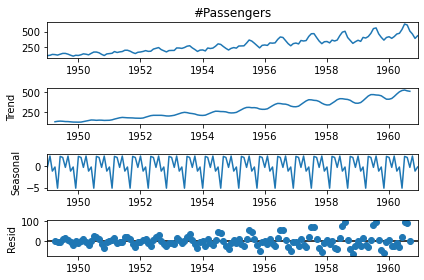

In [39]:
decompose_df=seasonal_decompose(df['#Passengers'],model='additive',period=7)
decompose_df.plot()
plt.show()

In [40]:
df['Date']=df.index

In [41]:
df

,#Passengers,Date
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01
...,...,...
1960-08-01,606,1960-08-01
1960-09-01,508,1960-09-01
1960-10-01,461,1960-10-01


In [42]:
train=df[df['Date']<pd.to_datetime('1960-08',format='%Y-%m')]

In [43]:
train

,#Passengers,Date
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01
...,...,...
1960-03-01,419,1960-03-01
1960-04-01,461,1960-04-01
1960-05-01,472,1960-05-01


In [44]:
train['train']=train['#Passengers']

In [45]:
train

,#Passengers,Date,train
Month,,,
1949-01-01,112,1949-01-01,112
1949-02-01,118,1949-02-01,118
1949-03-01,132,1949-03-01,132
1949-04-01,129,1949-04-01,129
1949-05-01,121,1949-05-01,121
...,...,...,...
1960-03-01,419,1960-03-01,419
1960-04-01,461,1960-04-01,461
1960-05-01,472,1960-05-01,472


In [46]:
del train['Date']

In [47]:
del train['#Passengers']

In [48]:
train

,train
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-03-01,419
1960-04-01,461
1960-05-01,472


In [49]:
test=df[df['Date']>=pd.to_datetime('1960-08',format='%Y-%m')]
test

,#Passengers,Date
Month,,
1960-08-01,606,1960-08-01
1960-09-01,508,1960-09-01
1960-10-01,461,1960-10-01
1960-11-01,390,1960-11-01
1960-12-01,432,1960-12-01


In [50]:
del test['Date']

In [51]:
test['test']=test['#Passengers']

In [52]:
del test['#Passengers']

In [53]:
test

,test
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


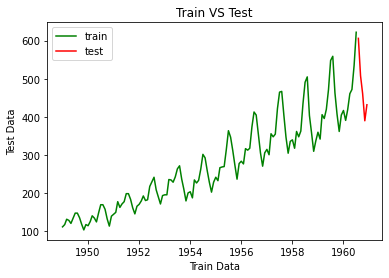

In [54]:
plt.plot(train,color='green',label='train')
plt.plot(test,color='red',label='test')
plt.title('Train VS Test')
plt.legend()
plt.xlabel('Train Data')
plt.ylabel('Test Data')
plt.show()

In [55]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: statsmodels>=0.13.2 in c:\users\shree\anaconda3\lib\site-packages (from pmdarima) (0.13.2)



In [56]:
from pmdarima.arima import auto_arima

In [57]:
model=auto_arima(train)

In [58]:
model.fit(train)

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [59]:
forecast=model.predict(n_period=len(test))

In [60]:
forecast=pd.DataFrame(forecast,index=test.index,columns=['Prediction'])

In [61]:
forecast

,Prediction
Month,
1960-08-01,609.537719
1960-09-01,569.572562
1960-10-01,524.516336
1960-11-01,483.040356
1960-12-01,480.301280


In [62]:
test

,test
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [63]:
from math import sqrt

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
rms=sqrt(mean_squared_error(test,forecast))

In [66]:
rms

61.36373890655744